In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [91]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [92]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [93]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [94]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [95]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [96]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
inspector = inspect(engine)

import pprint as pprint

# Get table information
print(inspector.get_table_names())

# Get column information
pprint.pprint(inspector.get_columns('measurement'))

['measurement', 'station']
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]


In [13]:
# Get table information
print(inspector.get_table_names())

# Get column information
pprint.pprint(inspector.get_columns('station'))

['measurement', 'station']
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'name',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'latitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'longitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'elevation',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]


In [23]:
import datetime as dt

lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate


('2017-08-23')

In [24]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
query_date

datetime.date(2016, 8, 22)

In [25]:
last_year_precipitation_data = session.query(Measurement.prcp, Measurement.date).\
                                                filter(Measurement.date > query_date).order_by(Measurement.date.asc()).all()
last_year_precipitation_data


[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [35]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(last_year_precipitation_data, columns=['precipitation_data', 'date'])
df.set_index('precipitation_data')
df = df.dropna()
df.head()

,precipitation_data,date
0,0.00,2016-08-23
1,0.15,2016-08-23
2,0.05,2016-08-23
4,0.02,2016-08-23
5,1.79,2016-08-23


In [41]:
grouped_prcp_data = df.groupby('date')
prcp_data_summary = pd.DataFrame({"precipitation_data": grouped_prcp_data["precipitation_data"].mean()})
prcp_data_summary = prcp_data_summary.reset_index()
prcp_data_summary

,date,precipitation_data
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
5,2016-08-28,0.516667
6,2016-08-29,0.243333
7,2016-08-30,0.011667
8,2016-08-31,0.636000
9,2016-09-01,0.006000


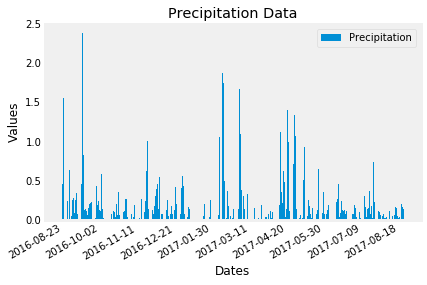

In [42]:
precipitation_data = prcp_data_summary["precipitation_data"]
dates = prcp_data_summary["date"]

fig, ax = plt.subplots()

data = ax.bar(dates, precipitation_data, label='Precipitation')

ax.set(xlabel='Dates', ylabel='Values',
       title='Precipitation Data')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.show()

In [43]:
_count = prcp_data_summary["precipitation_data"].count()
_mean = prcp_data_summary["precipitation_data"].mean()
_std = prcp_data_summary["precipitation_data"].std()
_min = prcp_data_summary["precipitation_data"].min()
_25percentile = prcp_data_summary["precipitation_data"].quantile(0.25)
_50percentile = prcp_data_summary["precipitation_data"].quantile(0.50)
_75percentile = prcp_data_summary["precipitation_data"].quantile(0.75)
_max = prcp_data_summary["precipitation_data"].max()


precipitation_data_summary = pd.DataFrame({"count": [_count], 
                                            "mean": [_mean],
                                            "std": [_std],
                                            "min": [_min],
                                            "25%": [_25percentile],
                                            "50%": [_50percentile],
                                            "75%": [_75percentile],
                                            "max": [_max]})
precipitation_data_summary

,count,mean,std,min,25%,50%,75%,max
0,366,0.170757,0.295683,0.0,0.008571,0.07,0.191667,2.38


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_summary_final = pd.melt(precipitation_data_summary, var_name="statistics", value_name="precipitation")
precipitation_data_summary_final = precipitation_data_summary_final.set_index("statistics")
precipitation_data_summary_final

,precipitation
statistics,
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [45]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).distinct().count()

9

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
               filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
temp = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').all()


In [51]:
temp_list = [i[0] for i in temp]

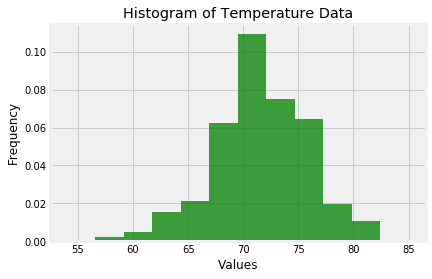

In [52]:
n, bins, patches = plt.hist(temp_list, 12, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Data')
plt.grid(True)
plt.show()


## Optional Challenge Assignment

In [53]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [54]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-01', '2017-03-01'))

[(59.0, 69.8586956521739, 80.0)]


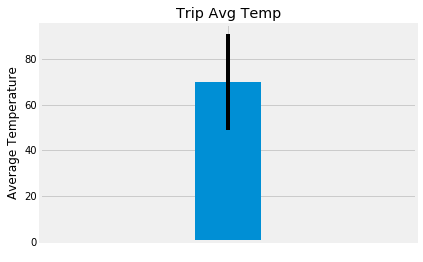

In [81]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_list = calc_temps('2017-02-01', '2017-03-01')
avg = temp_list[0][1]
peak_to_peak = temp_list[0][2] - temp_list[0][0]
ind = [1]

p = plt.bar(1, avg, 0.35, yerr=peak_to_peak)

plt.ylabel('Average Temperature')
plt.title('Trip Avg Temp')

plt.xlim([0, 2])
plt.xticks(ind, (' '))

plt.show()

In [105]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Measurement_table = session.query(Measurement.date, Measurement.station, Measurement.prcp).filter(Measurement.date >= '2017-02-01').filter(Measurement.date <= '2017-03-01').all()
Station_table = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

Measurement_df = pd.DataFrame(Measurement_table, columns = ["date", "station_id", "precitipation"])
Station_df = pd.DataFrame(Station_table, columns = ["station_id", "station_name", "station_latitude", "station_longitude", "station_elevation"])

source_data = Measurement_df.merge(Station_df, on='station_id', how='inner')


,date,station_id,precitipation,station_name,station_latitude,station_longitude,station_elevation
0,2017-02-01,USC00519397,0.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2017-02-02,USC00519397,0.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2017-02-03,USC00519397,0.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2017-02-04,USC00519397,0.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2017-02-05,USC00519397,0.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [116]:
source_data_grouped = source_data.groupby("station_id")
rainfall_data = pd.DataFrame({"precitipation": source_data_grouped["precitipation"].sum(),
                                "station_name": source_data_grouped["station_name"].unique().str.get(0),
                                "station_latitude": source_data_grouped["station_latitude"].unique().str.get(0),
                                "station_longitude": source_data_grouped["station_longitude"].unique().str.get(0),
                                "station_elevation": source_data_grouped["station_elevation"].unique().str.get(0)})
rainfall_data = rainfall_data.reset_index()
rainfall_data = rainfall_data.sort_values(by='precitipation', ascending=False)
rainfall_data

,station_id,precitipation,station_name,station_latitude,station_longitude,station_elevation
0,USC00513117,10.53,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,USC00519281,9.40,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00519523,8.37,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2,USC00516128,7.75,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00514830,7.19,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,4.87,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
3,USC00517948,2.57,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [117]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [118]:
daily_normals("02-01")

[(56.0, 68.14035087719299, 78.0)]

In [123]:
trip_dates = session.query(func.strftime("%m-%d", Measurement.date)).filter(Measurement.date >= "2017-02-01").filter(Measurement.date <= "2017-03-01").all()
trip_dates

[('02-01'),
 ('02-02'),
 ('02-03'),
 ('02-04'),
 ('02-05'),
 ('02-06'),
 ('02-07'),
 ('02-08'),
 ('02-09'),
 ('02-10'),
 ('02-11'),
 ('02-12'),
 ('02-13'),
 ('02-14'),
 ('02-15'),
 ('02-16'),
 ('02-17'),
 ('02-18'),
 ('02-19'),
 ('02-20'),
 ('02-21'),
 ('02-22'),
 ('02-23'),
 ('02-24'),
 ('02-25'),
 ('02-26'),
 ('02-27'),
 ('02-28'),
 ('03-01'),
 ('02-01'),
 ('02-02'),
 ('02-03'),
 ('02-04'),
 ('02-05'),
 ('02-06'),
 ('02-07'),
 ('02-08'),
 ('02-09'),
 ('02-10'),
 ('02-11'),
 ('02-12'),
 ('02-13'),
 ('02-14'),
 ('02-15'),
 ('02-16'),
 ('02-17'),
 ('02-18'),
 ('02-19'),
 ('02-20'),
 ('02-21'),
 ('02-22'),
 ('02-23'),
 ('02-24'),
 ('02-25'),
 ('02-26'),
 ('02-27'),
 ('02-28'),
 ('03-01'),
 ('02-01'),
 ('02-02'),
 ('02-03'),
 ('02-05'),
 ('02-06'),
 ('02-07'),
 ('02-08'),
 ('02-09'),
 ('02-10'),
 ('02-11'),
 ('02-12'),
 ('02-13'),
 ('02-14'),
 ('02-15'),
 ('02-16'),
 ('02-17'),
 ('02-20'),
 ('02-21'),
 ('02-22'),
 ('02-23'),
 ('02-24'),
 ('02-26'),
 ('02-27'),
 ('02-28'),
 ('03-01'),
 ('0

In [126]:
dates_list = [i[0] for i in trip_dates]
dates_list = list(set(dates_list))
dates_list

['02-10',
 '02-19',
 '02-04',
 '02-23',
 '02-25',
 '02-14',
 '02-22',
 '02-11',
 '02-13',
 '02-03',
 '02-09',
 '02-15',
 '02-24',
 '02-01',
 '02-28',
 '02-16',
 '02-17',
 '02-27',
 '02-05',
 '02-08',
 '02-18',
 '03-01',
 '02-20',
 '02-02',
 '02-12',
 '02-26',
 '02-06',
 '02-21',
 '02-07']

In [131]:
normals = []
for date in dates_list:
    normals_value = daily_normals(date)
    normals.append(normals_value[0])
normals

[(56.0, 68.41666666666667, 76.0),
 (60.0, 69.33962264150944, 77.0),
 (61.0, 68.14035087719299, 76.0),
 (62.0, 70.35593220338983, 81.0),
 (61.0, 68.59649122807018, 76.0),
 (62.0, 70.89473684210526, 79.0),
 (60.0, 70.15789473684211, 83.0),
 (61.0, 69.25, 79.0),
 (58.0, 70.36206896551724, 80.0),
 (58.0, 67.79661016949153, 77.0),
 (57.0, 67.58928571428571, 75.0),
 (56.0, 70.28813559322033, 79.0),
 (61.0, 68.56666666666666, 76.0),
 (56.0, 68.14035087719299, 78.0),
 (65.0, 70.65517241379311, 80.0),
 (59.0, 70.48214285714286, 76.0),
 (62.0, 70.47272727272727, 77.0),
 (58.0, 69.98148148148148, 77.0),
 (59.0, 69.6842105263158, 80.0),
 (56.0, 66.75438596491227, 74.0),
 (63.0, 70.79629629629629, 77.0),
 (64.0, 70.0327868852459, 76.0),
 (63.0, 70.14035087719299, 76.0),
 (59.0, 68.85964912280701, 77.0),
 (60.0, 69.15789473684211, 78.0),
 (62.0, 69.89285714285714, 78.0),
 (58.0, 70.38983050847457, 77.0),
 (63.0, 69.79629629629629, 76.0),
 (60.0, 69.0, 77.0)]

In [142]:
tmin = []
tavg = []
tmax = []
dates = []
for i in range(0,len(normals)):
    tmin.append(normals[i][0])
    tavg.append(normals[i][1])
    tmax.append(normals[i][2])
    dates.append("2017-"+ dates_list[i])

['2017-02-10',
 '2017-02-19',
 '2017-02-04',
 '2017-02-23',
 '2017-02-25',
 '2017-02-14',
 '2017-02-22',
 '2017-02-11',
 '2017-02-13',
 '2017-02-03',
 '2017-02-09',
 '2017-02-15',
 '2017-02-24',
 '2017-02-01',
 '2017-02-28',
 '2017-02-16',
 '2017-02-17',
 '2017-02-27',
 '2017-02-05',
 '2017-02-08',
 '2017-02-18',
 '2017-03-01',
 '2017-02-20',
 '2017-02-02',
 '2017-02-12',
 '2017-02-26',
 '2017-02-06',
 '2017-02-21',
 '2017-02-07']

In [147]:
normals_df = pd.DataFrame({"date": dates,
                            "tmin": tmin,
                            "tavg": tavg, 
                            "tmax": tmax})
normals_df.set_index("date", inplace = True)
normals_df

,tmin,tavg,tmax
date,,,
2017-02-10,56.0,68.416667,76.0
2017-02-19,60.0,69.339623,77.0
2017-02-04,61.0,68.140351,76.0
2017-02-23,62.0,70.355932,81.0
2017-02-25,61.0,68.596491,76.0
2017-02-14,62.0,70.894737,79.0
2017-02-22,60.0,70.157895,83.0
2017-02-11,61.0,69.250000,79.0
2017-02-13,58.0,70.362069,80.0


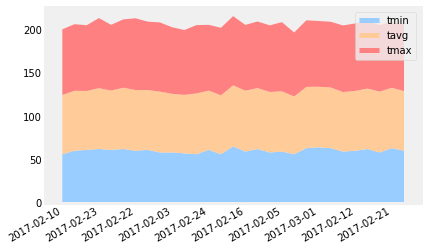

In [159]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots()

data = ax.stackplot(dates, normals_df["tmin"], normals_df["tavg"], normals_df["tmax"], colors=['#99ccff','#ffcc99','#ff8080'])

plt.plot([],[], color='#99ccff', label='tmin', linewidth=5)
plt.plot([],[], color='#ffcc99', label='tavg', linewidth=5)
plt.plot([],[], color='#ff8080', label='tmax', linewidth=5)

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.show()